# Projet 7 Mission 4

In [1]:

#import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

pd.set_option('display.float_format','{:.3f}'.format)
%matplotlib inline 


In [2]:

df_Mission4 = pd.read_csv('data/clean/set_Mission4.csv')

df_Mission4.head()


,Country_Code,Country_Name,Ci_Child,Ci_Parent,Income_Child,gdpppp,Population,Gini
0,ALB,Albania,1,1,728.898,7297,2947314,32.160
1,ALB,Albania,1,1,728.898,7297,2947314,32.160
2,ALB,Albania,1,1,728.898,7297,2947314,32.160
3,ALB,Albania,1,1,728.898,7297,2947314,32.160
4,ALB,Albania,1,1,728.898,7297,2947314,32.160


In [3]:
df_Mission4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699461 entries, 0 to 3699460
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Country_Code  object 
 1   Country_Name  object 
 2   Ci_Child      int64  
 3   Ci_Parent     int64  
 4   Income_Child  float64
 5   gdpppp        int64  
 6   Population    int64  
 7   Gini          float64
dtypes: float64(2), int64(4), object(2)
memory usage: 225.8+ MB


In [4]:

lis= {'Country_Code' : 'category',
      'Country_Name' : 'category',
      "Ci_Child":'int8',
      "Ci_Parent":'int8',
      'Income_Child' : 'float32',
      'gdpppp' : 'int16',
      'Population':'int32',
      'Gini':'float16'}

df_Mission4 = df_Mission4.astype(lis)
         

In [5]:

#Ajout d'une colone log pour travailler plus simplement.
df_Mission4['gdp_Log'] = np.log(df_Mission4.gdpppp)
df_Mission4['Income_Child_Log'] = np.log(df_Mission4.Income_Child)
df_Mission4.head()


/home/owen/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Country_Code,Country_Name,Ci_Child,Ci_Parent,Income_Child,gdpppp,Population,Gini,gdp_Log,Income_Child_Log
0,ALB,Albania,1,1,728.898,7297,2947314,32.156,8.895,6.592
1,ALB,Albania,1,1,728.898,7297,2947314,32.156,8.895,6.592
2,ALB,Albania,1,1,728.898,7297,2947314,32.156,8.895,6.592
3,ALB,Albania,1,1,728.898,7297,2947314,32.156,8.895,6.592
4,ALB,Albania,1,1,728.898,7297,2947314,32.156,8.895,6.592


## Anova

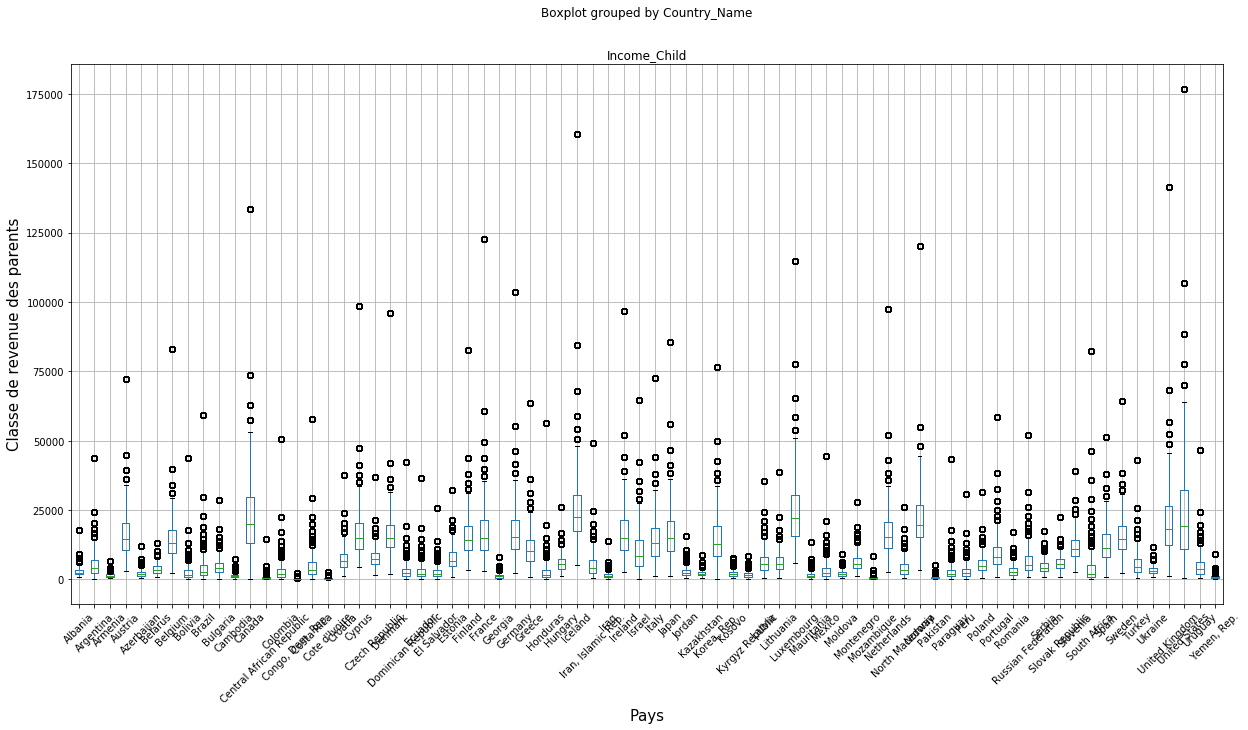

In [6]:

#Projection boites à moustaches
fig, ax = plt.subplots(figsize=(20,10))
df_Mission4.boxplot(column='Income_Child',by='Country_Name', ax=ax)
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Classe de revenue des parents", fontsize=15)
plt.xticks(rotation=45)
plt.savefig('./ImgFigure/M4_1.png')
plt.show()


In [7]:

# #Creation du model d'anova
#Fait cracher jupuyter pour le moment
# anova_variete = smf.ols('Income_Child~Country_Name', data=df_Mission4).fit()
# print(anova_variete.summary())



Mais la représentation de nos variables n'est pas précise avec ce modèle comme en témoigne la valeur de R² assez basse, passons nos revenus en base logarithmique


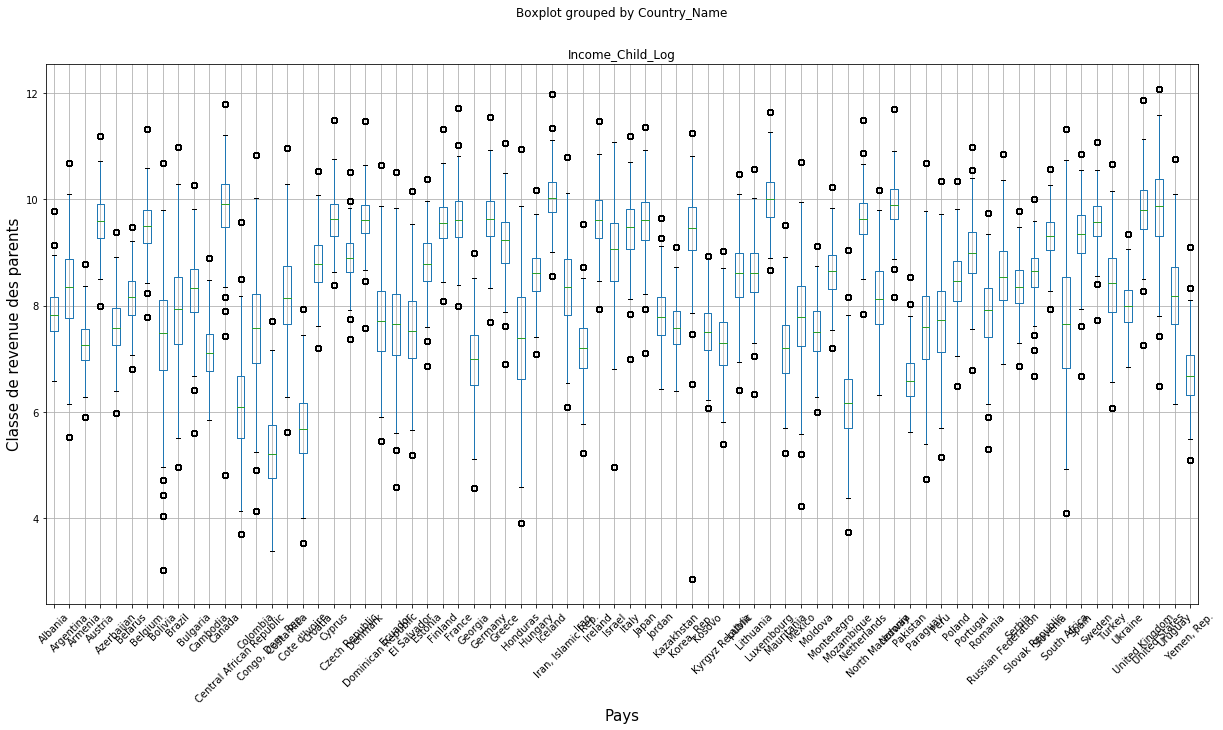

In [8]:

#Projection des boites a moustaches de la version logarithmique
fig, ax = plt.subplots(figsize=(20,10))
df_Mission4.boxplot(column='Income_Child_Log',by='Country_Name', ax=ax)
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Classe de revenue des parents", fontsize=15)
plt.xticks(rotation=45)
plt.savefig('./ImgFigure/M4_2.png')
plt.show()


In [9]:

# #Modification du model, changement des income en log
#fait cracher jupyter pour le moment
# anova_variete = smf.ols('Income_Child_Log~Country_Name', data=df_Mission4).fit()
# print(anova_variete.summary())



On peut voir ici une meilleur représentation avec un R² bien plus elever

On utilise ici une ANOVA qui va tester l'hypothèse nulle que deux ou plusieurs groupe est la même moyen de population.


In [10]:

# sm.stats.anova_lm(anova_variete, typ=2)


La p-valeur de ce test est largement inférieure à 5 %. On peut rejeter notre hypothèse nulle comme quoi les pays on la même moyen de population.

Le pays a donc bien un effet sur la distribution des revenus.

## Regression des revenus avec le revenus moyen et le pib des pays

In [11]:

#Regression des incomes normaux
reg_lin = smf.ols('Income_Child~gdpppp+Gini', data=df_Mission4).fit()
print(reg_lin.summary())


                            OLS Regression Results                            
Dep. Variable:           Income_Child   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                 2.679e+05
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:27:09   Log-Likelihood:            -3.9326e+07
No. Observations:             3699461   AIC:                         7.865e+07
Df Residuals:                 3699458   BIC:                         7.865e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.842e+04     21.140    871.217      0.0


Opérons quelques tests pour nous assurer de la fiabilité de notre modelé.


In [12]:

## Vérifier la colinéarité des variables
variables = reg_lin.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.014762637159182, 1.0147626371589902]

Tous les coefficients sont inférieurs à 10 donc il ne semble pas y avoir de colinéarité entre les variables.

Cherchons des valeur atypique dans notre modèle, d'après M. Belsey si des variables sont supérieurs aux leviers on peut les considère comme atypique.

In [13]:
alpha = 0.05
n = df_Mission4.shape[0]
p = 3

analyses = pd.DataFrame()

analyses['levier'] = reg_lin.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

prcentage = len(analyses.loc[analyses['levier'] > seuil_levier, :]) *100 / df_Mission4.shape[0]
print( '{} % des variable sont superieur aux valeurs des leviers'.format(prcentage))

5.404003448069868 % des variable sont superieur aux valeurs des leviers


On souhaite maintenant calculer les résidus studentisés.

In [14]:

analyses['rstudent'] = reg_lin.get_influence().resid_studentized_internal
# seuil_rstudent = t.ppf(1-alpha/2,n-p-1)


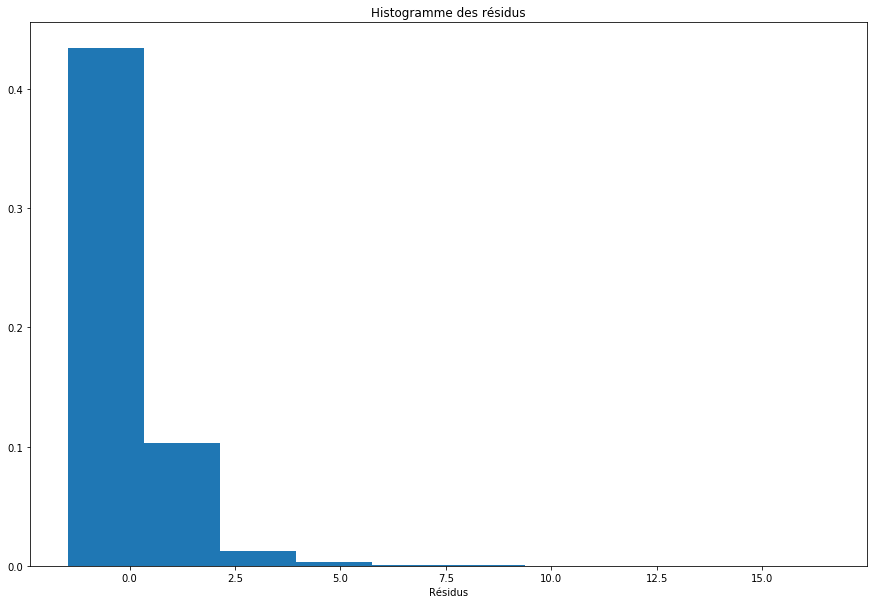

In [15]:

plt.figure(figsize=(15,10))
plt.hist(analyses['rstudent'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.savefig('./ImgFigure/M4_3.png')
plt.show()


Les resutlat ne sont pas tres interressant, passons en logarithme

In [16]:

#Regression lineaire des incomes logarithmique
reg_linLog = smf.ols('Income_Child_Log~gdp_Log+Gini', data=df_Mission4).fit()
print(reg_linLog.summary())


                            OLS Regression Results                            
Dep. Variable:       Income_Child_Log   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                 1.690e+06
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:27:12   Log-Likelihood:            -3.7966e+06
No. Observations:             3049277   AIC:                         7.593e+06
Df Residuals:                 3049274   BIC:                         7.593e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8642      0.006    153.330      0.0

Opérons quelque test pour nous assurer de la fiabilité de notre modele.

In [17]:

## Vérifier la colinéarité des variables
variables = reg_linLog.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.118720371520094, 1.1187203715200853]

Tous les coefficients sont inférieurs à 10 donc il ne semble pas y avoir de colinéarité entre les variables.

Cherchons des valeur atypique dans notre modèle, d'après M. Belsey si des variables sont supérieurs aux leviers on peut les considère comme atypique.

In [18]:
alpha = 0.05
n = df_Mission4.shape[0]
p = 3

analysesLog = pd.DataFrame()

analysesLog['levier'] = reg_linLog.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

prcentage = len(analysesLog.loc[analysesLog['levier'] > seuil_levier, :]) *100 / df_Mission4.shape[0]
print( '{} % des variable sont superieur aux valeurs des leviers'.format(prcentage))

6.750956423111367 % des variable sont superieur aux valeurs des leviers


On souhaite maintenant calculer les résidus studentisés.

In [19]:

analysesLog['rstudent'] = reg_linLog.get_influence().resid_studentized_internal


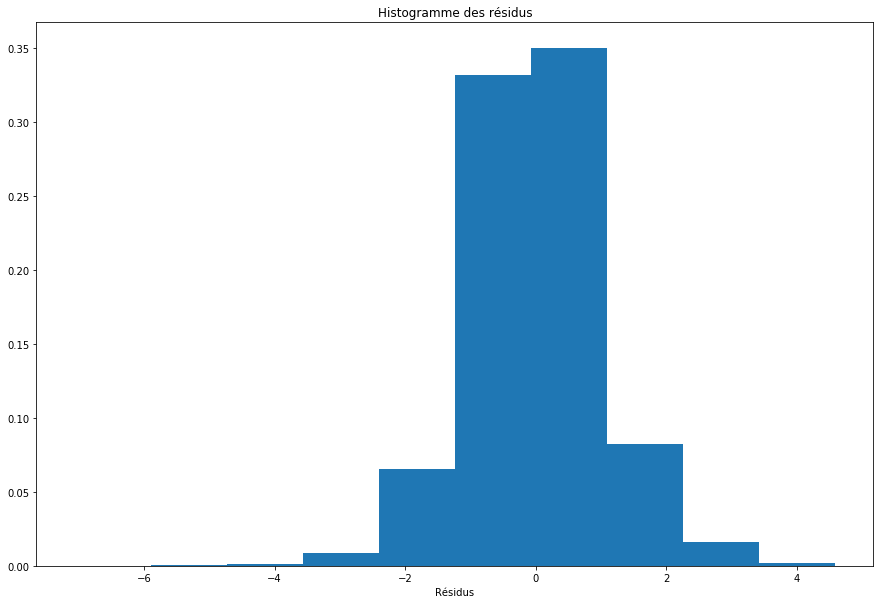

In [20]:

plt.figure(figsize=(15,10))
plt.hist(analysesLog['rstudent'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.savefig('./ImgFigure/M4_4.png')
plt.show()


Les resultat sont plus concluent ici

## Ajouts de la classe des parents

In [21]:

#Regression des incomes normaux
reg_lin2 = smf.ols('Income_Child~gdpppp+Gini+Ci_Parent', data=df_Mission4).fit()
print(reg_lin2.summary())


                            OLS Regression Results                            
Dep. Variable:           Income_Child   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                 2.426e+05
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:27:14   Log-Likelihood:            -3.9244e+07
No. Observations:             3699461   AIC:                         7.849e+07
Df Residuals:                 3699457   BIC:                         7.849e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.477e+04     22.512    656.193      0.0

Opérons quelque test pour nous assurer de la fiabilité de notre modele.

In [22]:

## Vérifier la colinéarité des variables
variables = reg_lin2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.0147626371612064, 1.0147626530191909, 1.0000000159043838]

Tous les coefficients sont inférieurs à 10 donc il ne semble pas y avoir de colinéarité entre les variables.

Cherchons des valeur atypique dans notre modèle, d'après M. Belsey si des variables sont supérieurs aux leviers on peut les considère comme atypique.

In [23]:
alpha = 0.05
n = df_Mission4.shape[0]
p = 4

analysesLin2 = pd.DataFrame()

analysesLin2['levier'] = reg_lin2.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

prcentage = len(analysesLin2.loc[analysesLin2['levier'] > seuil_levier, :]) *100 / df_Mission4.shape[0]
print( '{} % des variable sont superieur aux valeurs des leviers'.format(prcentage))

3.346487501827969 % des variable sont superieur aux valeurs des leviers


On souhaite maintenant calculer les résidus studentisés.

In [24]:

analysesLin2['rstudent'] = reg_lin2.get_influence().resid_studentized_internal


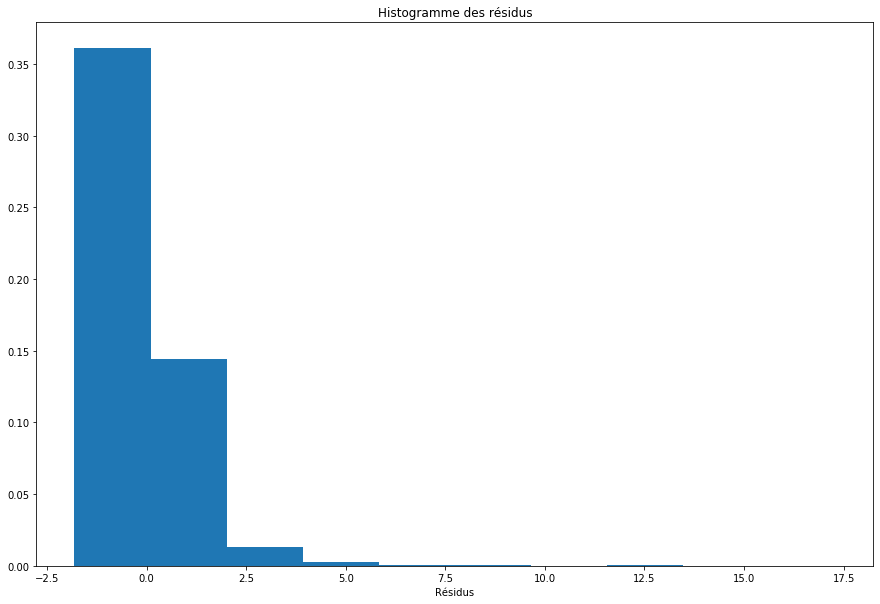

In [25]:

plt.figure(figsize=(15,10))
plt.hist(analysesLin2['rstudent'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.savefig('./ImgFigure/M4_5.png')
plt.show()


Encore une fois les resultat ne sont pas les meilleurs ici, essayons de passer en log

In [26]:

#Regression des incomes log
reg_linLog2 = smf.ols('Income_Child_Log~gdp_Log+Gini+Ci_Parent', data=df_Mission4).fit()
print(reg_linLog2.summary())


                            OLS Regression Results                            
Dep. Variable:       Income_Child_Log   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 1.490e+06
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:27:18   Log-Likelihood:            -3.5576e+06
No. Observations:             3049277   AIC:                         7.115e+06
Df Residuals:                 3049273   BIC:                         7.115e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3039      0.005     57.686      0.0

Opérons quelque test pour nous assurer de la fiabilité de notre modele.

In [27]:

## Vérifier la colinéarité des variables
variables = reg_linLog2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.1187203725844728, 1.118720385444553, 1.000000017497512]

Tous les coefficients sont inférieurs à 10 donc il ne semble pas y avoir de colinéarité entre les variables.

Cherchons des valeur atypique dans notre modèle, d'après M. Belsey si des variables sont supérieurs aux leviers on peut les considère comme atypique.

In [28]:
alpha = 0.05
n = df_Mission4.shape[0]
p = 4

analysesLog2 = pd.DataFrame()

analysesLog2['levier'] = reg_linLog2.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

analysesLog2.loc[analyses['levier'] > seuil_levier, :]

prcentage = len(analysesLog2.loc[analysesLog2['levier'] > seuil_levier, :]) *100 / df_Mission4.shape[0]
print( '{} % des variable sont superieur aux valeurs des leviers'.format(prcentage))

7.2883049719945685 % des variable sont superieur aux valeurs des leviers


On souhaite maintenant calculer les résidus studentisés.

In [29]:

analysesLog2['rstudent'] = reg_linLog2.get_influence().resid_studentized_internal


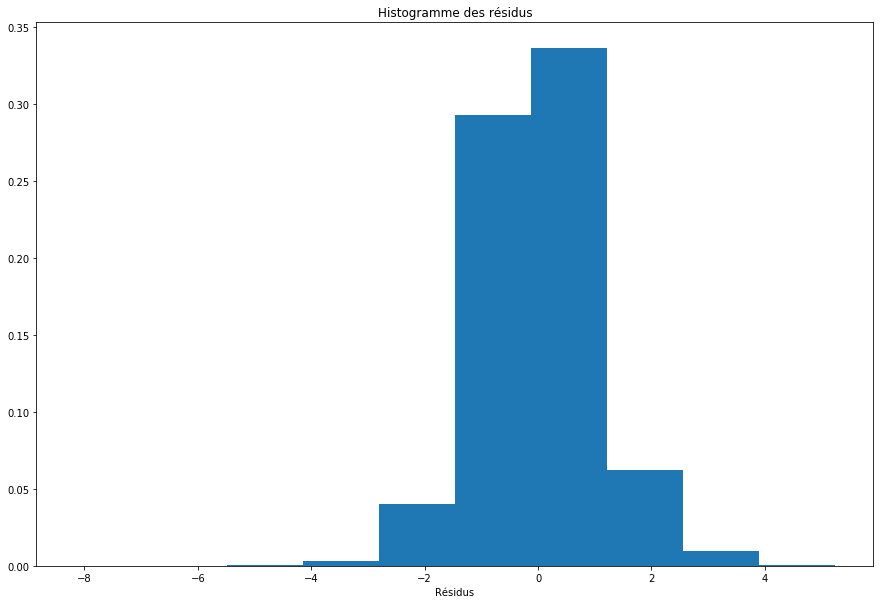

In [30]:

plt.figure(figsize=(15,10))
plt.hist(analysesLog2['rstudent'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.savefig('./ImgFigure/M4_6.png')
plt.show()
